Task 1: Absorbing Boundary Conditions
===

Background
---

Some calculations would require the background material to be extended infinitely in at least one direction. However, given the limitations on computer storage, we need to be able to create boundaries such that the domain appears to be infinite. 

Here, we consider the local boundary conditions designed by Engquist and Majda in 1977. These were developed such that the amplitude of the reflection coefficients were small, and that the BCs, along with the associated differential equation, guarantee a well-posed initial boundary value problem.

Derivation
---

For the 1-dimensional wave equation given by

\begin{equation}
\dfrac{\partial^2 U}{\partial x^2} = \dfrac{1}{c^2} \dfrac{\partial^2 U}{\partial t^2} 
\end{equation}

we can define an operator $G$ where

\begin{equation}
G = \dfrac{\partial^2}{\partial x^2} - \dfrac{1}{c^2} \dfrac{\partial^2}{\partial t^2} 
\end{equation}

so that the wave equation can be written easily as

\begin{equation}
GU = 0
\end{equation}

We can separate $G$ such that

\begin{equation}
G = G^+ G^-
\end{equation}

\begin{equation}
G^+ = \dfrac{\partial}{\partial x} + \dfrac{1}{c} \dfrac{\partial}{\partial t}
\end{equation}

\begin{equation}
G^- = \dfrac{\partial}{\partial x} - \dfrac{1}{c} \dfrac{\partial}{\partial t}
\end{equation}

At the left side of the boundary, where $x=0$, the application of the operator $G^-$ to any wavefunction $U$ exactly absorbs a plane wave propagating toward the left boundary at any incident angle. Simularly, the operator $G^+$ acting on $U$ absorbs a plane wave propagating toward the right boundary. Hence we have

\begin{equation}
G^-U = 0 \qquad \longrightarrow \qquad \dfrac{\partial U}{\partial x} - \dfrac{1}{c} \dfrac{\partial U}{\partial t} = 0
\end{equation}

and at the right side, at $x=d$,

\begin{equation}
G^+U = 0 \qquad \longrightarrow \qquad \dfrac{\partial U}{\partial x} + \dfrac{1}{c} \dfrac{\partial U}{\partial t} = 0
\end{equation}

We take the time derivative of both of the equations above 

\begin{equation}
\dfrac{\partial^2 U}{\partial x \partial t} - \dfrac{1}{c} \dfrac{\partial^2 U}{\partial t^2} = 0 \qquad \mathrm{at} \, x = 0
\end{equation}

\begin{equation}
\dfrac{\partial^2 U}{\partial x \partial t} + \dfrac{1}{c} \dfrac{\partial^2 U}{\partial t^2} = 0 \qquad \mathrm{at} \, x = d
\end{equation}

in order to be able to use the following expressions for the partial derivatives

\begin{align}
\left . \dfrac{\partial^2 W}{\partial x \partial t} \right |^n_{1/2} &= \dfrac{1}{2} \left [ \left( \dfrac{W \big|_{1}^{n+1} - W \big|_{0}^{n+1} }{\Delta t \Delta x} \right ) - \left( \dfrac{W \big|_{1}^{n-1} - W \big|_{0}^{n-1} }{\Delta t \Delta x} \right ) \right ] 
\\
&= \dfrac{1}{2} \left [ \left( \dfrac{W \big|_{i}^{n+1} - W \big|_{i-1}^{n+1} }{\Delta t \Delta x} \right ) - \left( \dfrac{W \big|_{i}^{n-1} - W \big|_{i-1}^{n-1} }{\Delta t \Delta x} \right ) \right ]
\end{align}

\begin{align}
\left . \dfrac{\partial^2 W}{\partial t^2} \right |^n_{1/2} &= \dfrac{1}{2} \left [ \left ( \dfrac{W \big|^{n+1}_{0} - 2 W \big|^{n}_{0} + W \big |^{n-1}_{0}}{(\Delta t)^2} \right ) + \left ( \dfrac{W \big|^{n+1}_{1} - 2 W \big|^{n}_{1} + W \big |^{n-1}_{1}}{(\Delta t)^2} \right ) \right ] 
\\
&= \dfrac{1}{2} \left [ \left ( \dfrac{W \big|^{n+1}_{i-1} - 2 W \big|^{n}_{i-1} + W \big |^{n-1}_{i-1}}{(\Delta t)^2} \right ) + \left ( \dfrac{W \big|^{n+1}_{i} - 2 W \big|^{n}_{i} + W \big |^{n-1}_{i}}{(\Delta t)^2} \right ) \right ]
\end{align}

At $x=0$, we want to obtain the function at the next time step given the information from the previous cycle. Here, we are looking for $W \Big|^{n+1}_{0}$. Substituting the expressions for the partial derivatives into the wave equation yields

\begin{equation}
W \big|^{n+1}_{0} = - W \big|_{1}^{n-1} + \left(\dfrac{c \Delta t - \Delta x}{c \Delta t + \Delta x}\right )\left (W \big|_{1}^{n+1}+W \big|_{0}^{n-1}\right )+\dfrac{2 \Delta x}{c \Delta t + \Delta x}\left( {W \big|^{n}_{0}}+ {W \big|^{n}_{1}}\right )
\end{equation}

In the code, we will initialize all values of $W$ to be zero. 

At one iteration, we have the value for $W \Big|_{1}^{n+1}$. After we use the above equation to obtain $W \Big|^{n+1}_{0}$, the program will then transfer the information in the variable $W \Big|^{n-1}$ to $W \Big|^{n}$, and $W \Big|^{n}$ to $W \Big|^{n+1}$, so that the following iteration can use these values.

Similarly at the other side of the boundary, we want to obtain $W \Big|_{i}^{n+1}$. 

\begin{equation}
W \big|_{i}^{n+1} = - W \big|_{i-1}^{n-1} + \left (W \big|_{i-1}^{n+1} + W \big |^{n-1}_{i} \right ) \left(\dfrac{c \Delta t - \Delta x}{c \Delta t + \Delta x}\right) + \dfrac{2 \Delta x}{c \Delta t + \Delta x}\left(W \big|^{n}_{i} + W \big|^{n}_{i-1} \right) 
\end{equation}

Similar to the left side of the boundary, we initialize all values of $W$ at zero. At a given iteration, we have $W \Big |_{i-1}^{n+1}$. After solving for $W \Big|_{i}^{n+1}$, the program will cycle through the variables in the same process as described in the left boundary.

Python Implementation
===

First, we start with importing several libraries for plotting, mathematical functions, and numpy for the arrays. The variable fignum is also defined; this is used to create several plots of the field.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import math as m

fignum = 0

We then define constants for the size of the spatial domain $nx$, the wave impedance $Z = \sqrt{\frac{\mu}{\epsilon}}$, and the speed of light $c = \frac{1}{\sqrt{\mu \epsilon}}$. We assume that the field is propagating in vacuum, hence $\epsilon = 1$ and $\mu = 1$. The spatial domain size is defined arbitrarily.

In [2]:
nx = 300
imp0 = 337.0
epsilon = 1
c = 1/np.sqrt(epsilon)

For the Gaussian source, we introduce variables for its location, width, and delay. The location of the source is placed at the center of the domain, the width is defined arbitrarily, and the ratio of the delay with respect to the source is taken from the previous task. 

We also define the temporal domain at this point. The term nx+srcdel is taken from the previous task, with the factor 1.5 added in order to view the field as it interacts with the boundary conditions.

In [3]:
srcori = int(nx/2)              #source origin
srcwid = 30.0*np.sqrt(epsilon)  #source width
srcdel = 10*srcwid              #source delay
nt = int(1.5*nx+srcdel)

Now, we create arrays for the $E_z$ and $H_y$ components of the field, along with an array $x$ for the spatial coordinates. Both fields are initialized at zero.

In [4]:
ez = np.zeros(nx)
hy = np.zeros(nx)
x = np.arange(0,nx-1,1)

Note that we defined the domain as integer steps, not as a real spatial interval divided into smaller intervals. Hence, the step $dx$ and $dt$ are already predefined as unity. We define the constants $a$ and $b$ such that
\begin{equation}
a = \dfrac{c \Delta t - \Delta x}{c \Delta t + \Delta x}
\end{equation}
\begin{equation}
b = \dfrac{2 \Delta x}{c \Delta t + \Delta x}
\end{equation}
and we assign these to variables

In [5]:
a = (c-1)/(c+1)
b = 2/(c + 1)

We also define variables for the boundary conditions, for both sides of the E-field and for both sides of the H-field. At the left, we have
\begin{align}
hwnp10 \rightarrow H \Big |^{n+1} _{0}  &\qquad ewnp10 \rightarrow E |^{n+1} _{0}
\\
hwnm11 \rightarrow H \Big |^{n-1} _{0}  &\qquad ewnm11 \rightarrow E |^{n-1} _{0}
\\
hwnp11 \rightarrow H \Big |^{n+1} _{1}  &\qquad ewnp11 \rightarrow E |^{n+1} _{1}
\\
hwnm10 \rightarrow H \Big |^{n-1} _{0} &\qquad ewnm10 \rightarrow E |^{n-1} _{0}
\\
hwn0 \rightarrow H \Big |^{n} _{0} &\qquad ewn0  \rightarrow E |^{n} _{0}
\\
hwn1 \rightarrow H \Big |^{n} _{1} &\qquad ewn1 \rightarrow E |^{n} _{1}
\end{align}

And at the right, 
\begin{align}
hwnp1im1 \rightarrow H \Big |^{n+1} _{i-1}  &\qquad ewnp1im1 \rightarrow E |^{n+1} _{i-1}
\\
hwnm1i \rightarrow H \Big |^{n-1} _{i-1}  &\qquad ewnm1i \rightarrow E |^{n-1} _{i-1}
\\
hwnp1i \rightarrow H \Big |^{n+1} _{i}  &\qquad ewnp1i \rightarrow E |^{n+1} _{i}
\\
hwnm1im1 \rightarrow H \Big |^{n-1} _{i-1} &\qquad ewnm1im1 \rightarrow E |^{n-1} _{i-1}
\\
hwnim1 \rightarrow H \Big |^{n} _{i-1} &\qquad ewnim1  \rightarrow E |^{n} _{i-1}
\\
hwni \rightarrow H \Big |^{n} _{i} &\qquad ewni \rightarrow E |^{n} _{i}
\end{align}

All of these variables are initialized to zero as the field is initially zero.

In [6]:
hwnp10, ewnp10 = 0,0 # W | ^{n+1} _{0}
hwnm11, ewnm11 = 0,0 # W | ^{n-1} _{1}
hwnp11, ewnp11 = 0,0 # W | ^{n+1} _{1}
hwnm10, ewnm10 = 0,0 # W | ^{n-1} _{0}
hwn0  , ewn0   = 0,0 # W | ^{n  } _{0}
hwn1  , ewn1   = 0,0 # W | ^{n  } _{1}

hwnp1im1, ewnp1im1 = 0,0 # W | ^{n+1} _{i-1}
hwnm1i  , ewnm1i   = 0,0 # W | ^{n-1} _{i  }
hwnp1i  , ewnp1i   = 0,0 # W | ^{n+1} _{i  }
hwnm1im1, ewnm1im1 = 0,0 # W | ^{n-1} _{i-1}
hwnim1  , ewnim1   = 0,0 # W | ^{n  } _{i-1}
hwni    , ewni     = 0,0 # W | ^{n  } _{i  }

For the actual loop, we begin with modifying the loop of the field with an additive source from the previous task. The source is a Gaussian field at the origin, defined here in line 24. The electric and magnetic fields propagate in lines 5 and 24.

In applying the boundary conditions at the left, we begin with setting the variable $H \Big |^{n+1} _{1}$ ($E \Big |^{n+1} _{1}$) using the field that was obtained in line 5(24). then we use the equation that we derived for $H \Big |^{n+1} _{0}$($ E \Big |^{n+1} _{0}$) in line 9(29). This then becomes the initial value of the field at $x=0$ for the next iteration. We then cycle through the values of $H$($E$) which will be used for the next run of the loop.

Similarly to the right, we begin with $H \Big |^{n+1} _{i-1}$($E \Big |^{n+1} _{i-1}$), and assign to this the value of the field at at $nx-2$ (note that the field goes only from $0$ to $nx-1$). In order to obtain the field at $nx-1$, we use the previously derived equation and assign this to the array at $x=nx-1$. Then we also cycle through the values of $H$($E$) for the next iteration.

The code starting from line 41 is used to plot the fields.

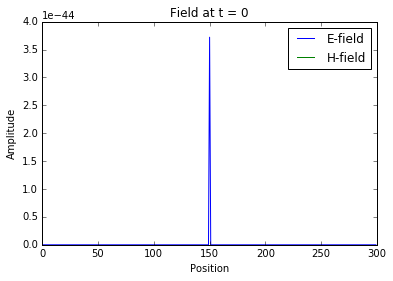

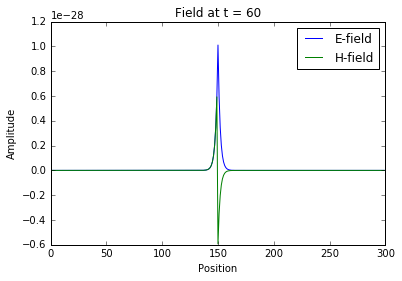

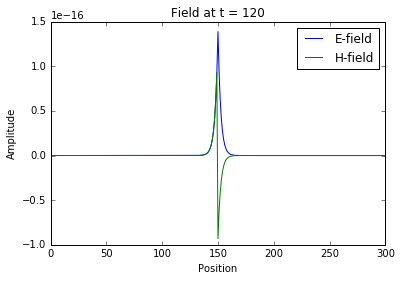

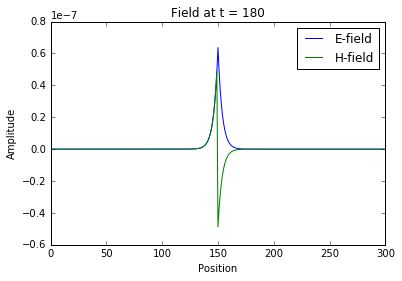

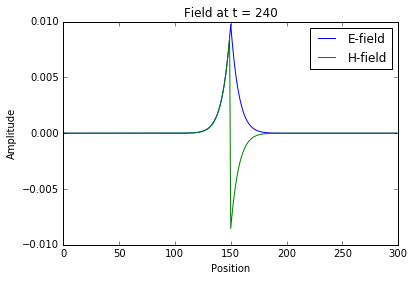

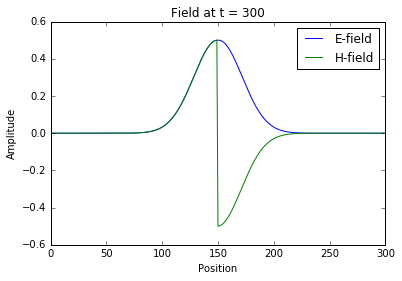

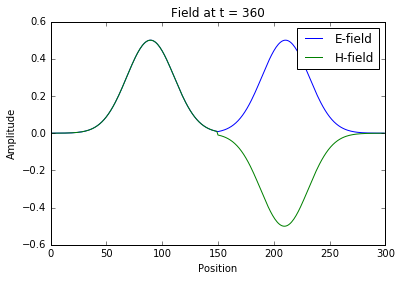

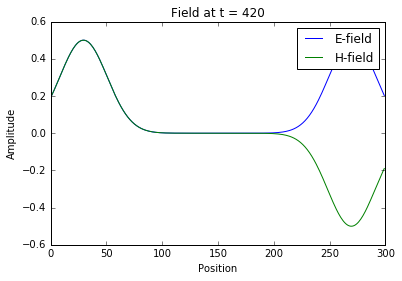

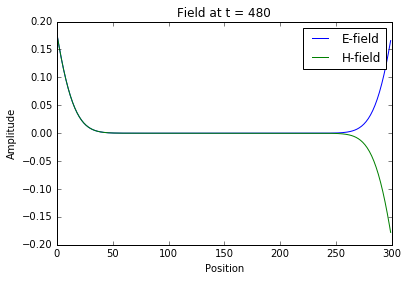

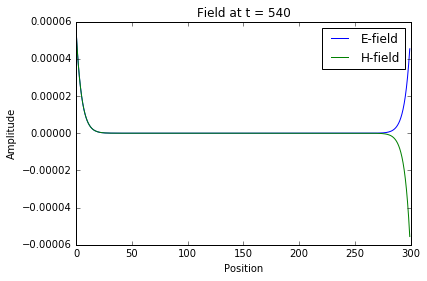

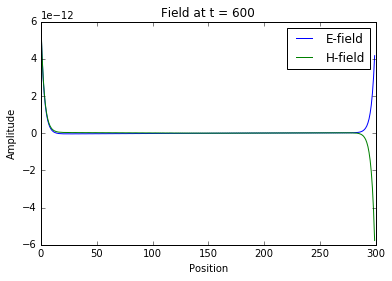

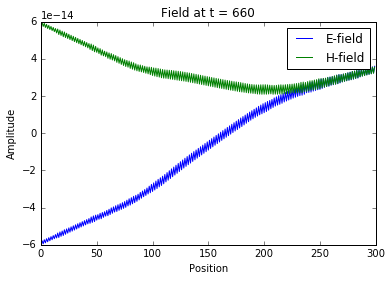

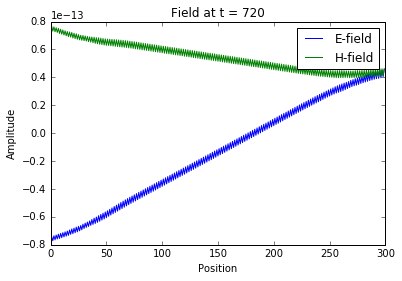

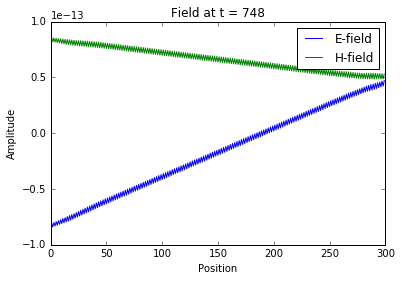

In [7]:
for dt in range(0,nt):
    ######################
    #Magnetic field
    ######################
    hy[x] = hy[x] + (ez[x+1] - ez[x])/imp0

    #abc at left
    hwnp11 = hy[1]
    hwnp10 = -hwnm11 + a*(hwnp11 + hwnm10) + b*(hwn0 + hwn1)
    hy[0] = hwnp10
    hwnm11, hwnm10 = hwn1, hwn0
    hwn1, hwn0  = hwnp11, hwnp10
    
    #abc at right
    hwnp1im1 = hy[-2]
    hwnp1i = - hwnm1im1 + a*(hwnp1im1 + hwnm1i) + b*(hwnp1i + hwnim1)
    hy[-1] = hwnp1i
    hwnm1i, hwnm1im1 = hwni, hwnim1
    hwni, hwnim1  = hwnp1i, hwnp1im1
    
    ######################
    #Electric field
    ######################
    ez[x+1] = ez[x+1] + (hy[x+1]-hy[x])*imp0/epsilon
    ez[srcori] += m.exp(-((dt-srcdel)*(dt-srcdel))/(srcwid*srcwid))

    #abc at left
    ewnp11 = ez[1]
    ewnp10 = -ewnm11 + a*(ewnp11 + ewnm10) + b*(ewn0 + ewn1)
    ez[0] = ewnp10
    ewnm11, ewnm10 = ewn1, ewn0
    ewn1, ewn0  = ewnp11, ewnp10
    
    #abc at right
    ewnp1im1 = ez[-2]
    ewnp1i = - ewnm1im1 + a*(ewnp1im1 + ewnm1i) + b*(ewnp1i + ewnim1)
    ez[-1] = ewnp1i
    ewnm1i, ewnm1im1 = ewni, ewnim1
    ewni, ewnim1  = ewnp1i, ewnp1im1

    plt.hold(True)
    if (dt % 60 == 0 or dt == nt-2):
        fignum = fignum + 1
        plt.figure(fignum)
        plt.xlabel("Position")
        plt.ylabel("Amplitude")
        plt.title("Field at t = "+ str(dt))
        plt.plot(ez, label="E-field")
        plt.plot(hy*imp0, label="H-field")
        plt.legend()

References
==

Taflove, A. & Hagness, S. C. *Computational electrodynamics: the finite-difference time-domain method*. (Artech House, 2005).

Engquist, B. & Majda, A. *Absorbing boundary conditions for numerical simulation of waves*. Proc Natl Acad Sci U S A 74, 1765–1766 (1977).
